In [1]:
import os
import sys
import time
import warnings
import platform
from datetime import datetime,timedelta

# Basic Data Analysis Tools
import numpy as np
import pandas as pd

# https://financedata.github.io/posts/finance-data-reader-users-guide.html
# import FinanceDataReader as fdr

# Exploratory Data Analysis (EDA)
import matplotlib as mpl
from matplotlib import rc
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.offline as offline
import plotly.graph_objs as go
import scipy as sp

# Data Preprocessing and Cleansing
from sklearn.preprocessing import LabelEncoder
from scipy.integrate import quad

# Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer

# Train / Test Dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Machine Learning Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# from vecstack import stacking

# Hyper Param Optimization
from sklearn.model_selection import GridSearchCV

# testing
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# from sklearn.externals import joblib 

In [2]:
from ngboost.ngboost import NGBoost
from ngboost.learners import default_tree_learner
from ngboost.scores import CRPS, MLE
from ngboost.distns import LogNormal, Normal

In [3]:
from dateutil.relativedelta import *

In [4]:
import datetime, time

In [5]:
# pd.options.display.max_rows = 999
# pd.options.display.max_columns = 100

In [92]:
# ['피앤이솔루션.xlsx', '엘앤에프.xlsx', '이엔에프테크놀로지.xlsx', '코스모신소재.xlsx', '씨아이에스.xlsx']
company = '씨아이에스'

In [93]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')
data = pd.read_csv('data_2_{}.csv'.format(company),thousands=',',index_col=0)
# rl_data = pd.read_csv('rl_data.csv',thousands=',',index_col=0)
data.head()

,asset(1000),debt(1000),sales(1000),adjusted_price,volumne(mean_5d)(week),volumne(week),profit(1000),term_profit(1000),gross_margin(1000),adjusted_BPS,...,event15,event16,profit_rate,rate_rolling_3,rate_rolling_5,rate_rolling_10,rate_rolling_30,rate_rolling_120,rate_rolling_150,target
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-02,66880353.61,41078629.13,14385508.16,2401.0,3395211.0,3395211.0,1340183.31,1568145.83,4764766.93,522.97,...,0.031497,-0.086687,-0.688073,NaN,NaN,NaN,NaN,NaN,NaN,-1
2015-09-03,66880353.61,41078629.13,14385508.16,2407.0,1795068.0,194925.0,1340183.31,1568145.83,4764766.93,522.97,...,0.094527,-0.029896,0.462963,NaN,NaN,NaN,NaN,NaN,NaN,1
2015-09-04,66880353.61,41078629.13,14385508.16,2412.0,1245348.0,145908.0,1340183.31,1568145.83,4764766.93,522.97,...,0.041923,-0.085210,0.231481,0.473983,NaN,NaN,NaN,NaN,NaN,1
2015-09-07,66880353.61,41078629.13,14385508.16,2407.0,940610.0,26397.0,1340183.31,1568145.83,4764766.93,522.97,...,0.019520,-0.068014,0.462963,0.002124,NaN,NaN,NaN,NaN,NaN,1
2015-09-08,66880353.61,41078629.13,14385508.16,2412.0,760548.0,40299.0,1340183.31,1568145.83,4764766.93,522.97,...,0.179790,0.021258,0.462963,0.385802,0.423279,NaN,NaN,NaN,NaN,1


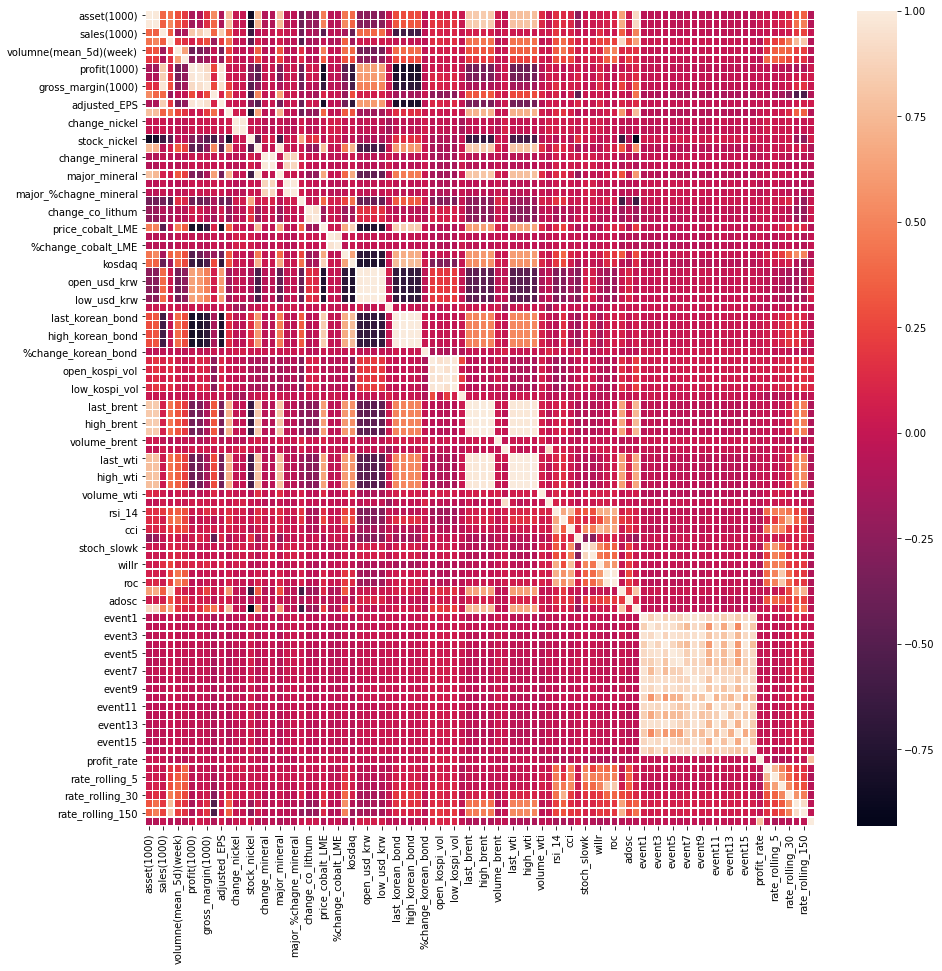

In [94]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), linewidths=.5)
plt.show()

In [95]:
data.columns

Index(['asset(1000)', 'debt(1000)', 'sales(1000)', 'adjusted_price',
       'volumne(mean_5d)(week)', 'volumne(week)', 'profit(1000)',
       'term_profit(1000)', 'gross_margin(1000)', 'adjusted_BPS',
       'adjusted_EPS', 'price_nickel', 'change_nickel', '%change_nickel',
       'stock_nickel', 'index_mineral', 'change_mineral', '%change_mineral',
       'major_mineral', 'major_change_mineral', 'major_%chagne_mineral',
       'price_co_lithum', 'change_co_lithum', '%change_co_lithum',
       'price_cobalt_LME', 'change_cobalt_LME', '%change_cobalt_LME', 'kospi',
       'kosdaq', 'last_usd_krw', 'open_usd_krw', 'high_usd_krw', 'low_usd_krw',
       '%change_usd_krw', 'last_korean_bond', 'open_korean_bond',
       'high_korean_bond', 'low_korean_bond', '%change_korean_bond',
       'last_kospi_vol', 'open_kospi_vol', 'high_kospi_vol', 'low_kospi_vol',
       '%change_kospi_vol', 'last_brent', 'open_brent', 'high_brent',
       'low_brent', 'volume_brent', '%change_brent', 'last_wti', '

In [96]:
# data.isnull().sum()

In [97]:
data['asset_merge'] = data[['asset(1000)', 'debt(1000)', 'sales(1000)']].mean(axis=1)
data['profit_merge'] = data[['profit(1000)','term_profit(1000)', 'gross_margin(1000)', 'adjusted_BPS','adjusted_EPS']].mean(axis=1)
data['kospi_vol_merge'] = data[['last_kospi_vol', 'open_kospi_vol', 'high_kospi_vol', 'low_kospi_vol']].mean(axis=1)
data['ko_bond_merge'] = data[['last_korean_bond', 'open_korean_bond', 'high_korean_bond', 'low_korean_bond']].mean(axis=1)
data['usd_krw_merge'] = data[['last_usd_krw', 'open_usd_krw', 'high_usd_krw', 'low_usd_krw']].mean(axis=1)
data['brent_merge'] = data[['last_brent', 'open_brent', 'high_brent','low_brent']].mean(axis=1)
data['wti_merge'] = data[['last_wti', 'open_wti','high_wti', 'low_wti']].mean(axis=1)

In [98]:
data['profit_mean3']=data['profit_merge'].rolling(window=3).mean()
data['brent_mean3']=data['brent_merge'].rolling(window=3).mean()
data['wti_mean3']=data['wti_merge'].rolling(window=3).mean()
data['p_nickel_mean3']=data['price_nickel'].rolling(window=3).mean()
data['s_niceel_mean3']=data['stock_nickel'].rolling(window=3).mean()
data['mineral_mean3']=data['index_mineral'].rolling(window=3).mean()
data['m_mineral_mean3']=data['major_mineral'].rolling(window=3).mean()
data['p_coli_mean3']=data['price_co_lithum'].rolling(window=3).mean()

data['kospivol_mean3']=data['kospi_vol_merge'].rolling(window=3).mean()
data['ko_bond_mean3']=data['ko_bond_merge'].rolling(window=3).mean()
data['usd_krw_mean3']=data['usd_krw_merge'].rolling(window=3).mean()


In [99]:
data['profit_std5']=data['profit_merge'].rolling(window=5).std()
data['brent_std5']=data['brent_merge'].rolling(window=5).std()
data['wti_std5']=data['wti_merge'].rolling(window=5).std()
data['p_nickel_std5']=data['price_nickel'].rolling(window=5).std()
data['s_niceel_std5']=data['stock_nickel'].rolling(window=5).std()
data['mineral_std5']=data['index_mineral'].rolling(window=5).std()
data['m_mineral_std5']=data['major_mineral'].rolling(window=5).std()
data['p_coli_std5']=data['price_co_lithum'].rolling(window=5).std()

data['kospivol_std5']=data['kospi_vol_merge'].rolling(window=5).std()
data['ko_bond_std5']=data['ko_bond_merge'].rolling(window=5).std()
data['usd_krw_std5']=data['usd_krw_merge'].rolling(window=5).std()


In [100]:
data.columns.values

array(['asset(1000)', 'debt(1000)', 'sales(1000)', 'adjusted_price',
       'volumne(mean_5d)(week)', 'volumne(week)', 'profit(1000)',
       'term_profit(1000)', 'gross_margin(1000)', 'adjusted_BPS',
       'adjusted_EPS', 'price_nickel', 'change_nickel', '%change_nickel',
       'stock_nickel', 'index_mineral', 'change_mineral',
       '%change_mineral', 'major_mineral', 'major_change_mineral',
       'major_%chagne_mineral', 'price_co_lithum', 'change_co_lithum',
       '%change_co_lithum', 'price_cobalt_LME', 'change_cobalt_LME',
       '%change_cobalt_LME', 'kospi', 'kosdaq', 'last_usd_krw',
       'open_usd_krw', 'high_usd_krw', 'low_usd_krw', '%change_usd_krw',
       'last_korean_bond', 'open_korean_bond', 'high_korean_bond',
       'low_korean_bond', '%change_korean_bond', 'last_kospi_vol',
       'open_kospi_vol', 'high_kospi_vol', 'low_kospi_vol',
       '%change_kospi_vol', 'last_brent', 'open_brent', 'high_brent',
       'low_brent', 'volume_brent', '%change_brent', 'last_

In [101]:
# ! pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

In [102]:
battery_feature =[
#     'asset(1000)', 'debt(1000)', 'sales(1000)',
    'adjusted_price',
       'volumne(mean_5d)(week)', 'volumne(week)', 
#     'profit(1000)','term_profit(1000)', 'gross_margin(1000)', 'adjusted_BPS','adjusted_EPS',
    'price_nickel', 'change_nickel', '%change_nickel',
       'stock_nickel', 'index_mineral', 'change_mineral',
       '%change_mineral', 'major_mineral', 'major_change_mineral',
       'major_%chagne_mineral', 'price_co_lithum', 'change_co_lithum',
       '%change_co_lithum', 'price_cobalt_LME', 'change_cobalt_LME',
       '%change_cobalt_LME', 'kospi', 'kosdaq', 
#     'last_usd_krw',  'open_usd_krw', 'high_usd_krw', 'low_usd_krw', 
    '%change_usd_krw',
#        'last_korean_bond', 'open_korean_bond', 'high_korean_bond','low_korean_bond', 
    '%change_korean_bond', 
#     'last_kospi_vol','open_kospi_vol', 'high_kospi_vol', 'low_kospi_vol',
       '%change_kospi_vol',
#     'last_brent', 'open_brent', 'high_brent','low_brent', 
    'volume_brent', '%change_brent', 
#     'last_wti', 'open_wti', 'high_wti', 'low_wti', 
    'volume_wti', '%change_wti',
       'rsi_14', 'macd', 'cci', 'adx', 'stoch_slowk', 'stoch_slowd',
       'willr', 'momentum', 'roc', 'ema20', 'adosc', 'obv', 'profit_rate', 'rate_rolling_3',
       'rate_rolling_5', 'rate_rolling_10', 'rate_rolling_30',
       'rate_rolling_120', 'rate_rolling_150', 'target', 'asset_merge',
       'profit_merge', 'kospi_vol_merge', 'ko_bond_merge',
       'usd_krw_merge', 'brent_merge', 'wti_merge', 'profit_mean3',
       'brent_mean3', 'wti_mean3', 'p_nickel_mean3', 's_niceel_mean3',
       'mineral_mean3', 'm_mineral_mean3', 'p_coli_mean3',
       'kospivol_mean3', 'ko_bond_mean3', 'usd_krw_mean3', 'profit_std5',
       'brent_std5', 'wti_std5', 'p_nickel_std5', 's_niceel_std5',
       'mineral_std5', 'm_mineral_std5', 'p_coli_std5', 'kospivol_std5',
       'ko_bond_std5', 'usd_krw_std5']

In [103]:
event_feature = ['event1', 'event2', 'event3', 'event4', 'event5',
                    'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
                    'event13', 'event14', 'event15', 'event16']

In [104]:
all_feature  = [
#     'asset(1000)', 'debt(1000)', 'sales(1000)',
    'adjusted_price',
       'volumne(mean_5d)(week)', 'volumne(week)', 
#     'profit(1000)','term_profit(1000)', 'gross_margin(1000)', 'adjusted_BPS','adjusted_EPS',
    'price_nickel', 'change_nickel', '%change_nickel',
       'stock_nickel', 'index_mineral', 'change_mineral',
       '%change_mineral', 'major_mineral', 'major_change_mineral',
       'major_%chagne_mineral', 'price_co_lithum', 'change_co_lithum',
       '%change_co_lithum', 'price_cobalt_LME', 'change_cobalt_LME',
       '%change_cobalt_LME', 'kospi', 'kosdaq', 
#     'last_usd_krw',  'open_usd_krw', 'high_usd_krw', 'low_usd_krw', 
    '%change_usd_krw',
#        'last_korean_bond', 'open_korean_bond', 'high_korean_bond','low_korean_bond', 
    '%change_korean_bond', 
#     'last_kospi_vol','open_kospi_vol', 'high_kospi_vol', 'low_kospi_vol',
       '%change_kospi_vol',
#     'last_brent', 'open_brent', 'high_brent','low_brent', 
    'volume_brent', '%change_brent', 
#     'last_wti', 'open_wti', 'high_wti', 'low_wti', 
    'volume_wti', '%change_wti',
       'rsi_14', 'macd', 'cci', 'adx', 'stoch_slowk', 'stoch_slowd',
       'willr', 'momentum', 'roc', 'ema20', 'adosc', 'obv', 'profit_rate', 'rate_rolling_3',
       'rate_rolling_5', 'rate_rolling_10', 'rate_rolling_30',
       'rate_rolling_120', 'rate_rolling_150', 'target', 'asset_merge',
       'profit_merge', 'kospi_vol_merge', 'ko_bond_merge',
       'usd_krw_merge', 'brent_merge', 'wti_merge', 'profit_mean3',
       'brent_mean3', 'wti_mean3', 'p_nickel_mean3', 's_niceel_mean3',
       'mineral_mean3', 'm_mineral_mean3', 'p_coli_mean3',
       'kospivol_mean3', 'ko_bond_mean3', 'usd_krw_mean3', 'profit_std5',
       'brent_std5', 'wti_std5', 'p_nickel_std5', 's_niceel_std5',
       'mineral_std5', 'm_mineral_std5', 'p_coli_std5', 'kospivol_std5',
       'ko_bond_std5', 'usd_krw_std5',
              'event1', 'event2', 'event3', 'event4', 'event5',
                    'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
                    'event13', 'event14', 'event15', 'event16']

In [105]:
data1 = data[all_feature]

In [108]:
data1.columns

Index(['adjusted_price', 'volumne(mean_5d)(week)', 'volumne(week)',
       'price_nickel', 'change_nickel', '%change_nickel', 'stock_nickel',
       'index_mineral', 'change_mineral', '%change_mineral', 'major_mineral',
       'major_change_mineral', 'major_%chagne_mineral', 'price_co_lithum',
       'change_co_lithum', '%change_co_lithum', 'price_cobalt_LME',
       'change_cobalt_LME', '%change_cobalt_LME', 'kospi', 'kosdaq',
       '%change_usd_krw', '%change_korean_bond', '%change_kospi_vol',
       'volume_brent', '%change_brent', 'volume_wti', '%change_wti', 'rsi_14',
       'macd', 'cci', 'adx', 'stoch_slowk', 'stoch_slowd', 'willr', 'momentum',
       'roc', 'ema20', 'adosc', 'obv', 'profit_rate', 'rate_rolling_3',
       'rate_rolling_5', 'rate_rolling_10', 'rate_rolling_30',
       'rate_rolling_120', 'rate_rolling_150', 'target', 'asset_merge',
       'profit_merge', 'kospi_vol_merge', 'ko_bond_merge', 'usd_krw_merge',
       'brent_merge', 'wti_merge', 'profit_mean3', 'bren

In [109]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')
data1.to_csv("data_{}.csv".format(company))

In [21]:
data = data[battery_feature]

In [22]:
data.isnull().sum()

adjusted_price            0
volumne(mean_5d)(week)    0
volumne(week)             0
price_nickel              0
change_nickel             0
                         ..
m_mineral_std5            4
p_coli_std5               4
kospivol_std5             4
ko_bond_std5              4
usd_krw_std5              4
Length: 77, dtype: int64

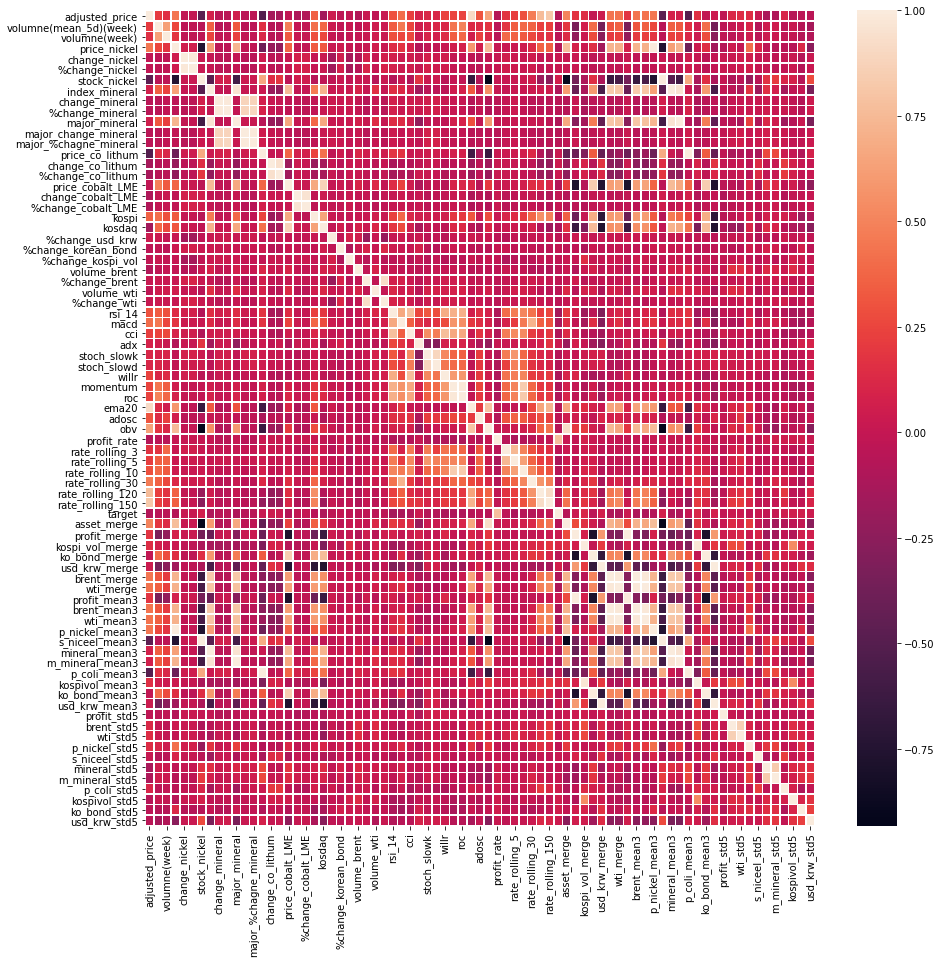

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), linewidths=.5)
plt.show()

좀 줄이기

In [46]:
test_data = data['2019':]
# test_data.to_csv('test.csv')

train_data = data['2017':'2019']
# train_data.to_csv('train.csv') 

train_data = train_data.reset_index()
test_data = test_data.reset_index()

train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

col = train_data.columns.to_list()
del col[col.index('target')]
del col[col.index('profit_rate')]
# del col[col.index('Date')]

X = train_data[col]
y = train_data['target']

In [49]:
train_data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
test_X = test_data[col]
test_y = test_data['target']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=2019)

In [51]:
date_columns = 'Date'
# train_data[date_columns]

In [52]:
# X_train = X_train.drop('Date', axis=1)
# X_val = X_val.drop('Date', axis=1)

In [53]:
class TimeBasedCV(object):
    '''
    Parameters 
    ----------
    train_period: int
        number of time units to include in each train set
        default is 30
    test_period: int
        number of time units to include in each test set
        default is 7
    freq: string
        frequency of input parameters. possible values are: days, months, years, weeks, hours, minutes, seconds
        possible values designed to be used by dateutil.relativedelta class
        deafault is days
    '''
    
    
    def __init__(self, train_period=30, test_period=7, freq='days'):
        self.train_period = train_period
        self.test_period = test_period
        self.freq = freq

        
        
    def split(self, data, validation_split_date=None, date_column='Date', gap=0):
        '''
        Generate indices to split data into training and test set
        
        Parameters 
        ----------
        data: pandas DataFrame
            your data, contain one column for the record date 
        validation_split_date: datetime.date()
            first date to perform the splitting on.
            if not provided will set to be the minimum date in the data after the first training set
        date_column: string, deafult='record_date'
            date of each record
        gap: int, default=0
            for cases the test set does not come right after the train set,
            *gap* days are left between train and test sets
        
        Returns 
        -------
        train_index ,test_index: 
            list of tuples (train index, test index) similar to sklearn model selection
        '''
        
        # check that date_column exist in the data:
        try:
            data[date_column]
        except:
            raise KeyError(date_column)
                    
        train_indices_list = []
        test_indices_list = []

        if validation_split_date==None:
            validation_split_date = data[date_column].min().date() + eval('relativedelta('+self.freq+'=self.train_period)')
        
        start_train = validation_split_date - eval('relativedelta('+self.freq+'=self.train_period)')
        end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
        start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
        end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        while end_test < data[date_column].max().date():
            # train indices:
            cur_train_indices = list(data[(data[date_column].dt.date>=start_train) & 
                                     (data[date_column].dt.date<end_train)].index)

            # test indices:
            cur_test_indices = list(data[(data[date_column].dt.date>=start_test) &
                                    (data[date_column].dt.date<end_test)].index)
            
            print("Train period:",start_train,"-" , end_train, ", Test period", start_test, "-", end_test,
                  "# train records", len(cur_train_indices), ", # test records", len(cur_test_indices))

            train_indices_list.append(cur_train_indices)
            test_indices_list.append(cur_test_indices)

            # update dates:
            start_train = start_train + eval('relativedelta('+self.freq+'=self.test_period)')
            end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
            start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
            end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        # mimic sklearn output  
        index_output = [(train,test) for train,test in zip(train_indices_list,test_indices_list)]

        self.n_splits = len(index_output)
        
        return index_output
    
    
    def get_n_splits(self):
        """Returns the number of splitting iterations in the cross-validator
        Returns
        -------
        n_splits : int
            Returns the number of splitting iterations in the cross-validator.
        """
        return self.n_splits

In [54]:
tscv = TimeBasedCV(train_period=300,
                   test_period=80,
                   freq='days')
# for train_index, test_index in tscv.split(X, validation_split_date=datetime.date(2014,1,1)):
#     print(train_index, test_index)

In [55]:
def sliding_window_validate_with_model(model):

    model_name = type(model).__name__

    print('현재 학습 중인 모델 : {}'.format(model_name))
    scores = []
    for train_index, test_index in tscv.split(X, validation_split_date=datetime.date(2014,1,1)):
# X_train, X_val, y_train, y_val
        X_train   = X.loc[train_index].drop('Date', axis=1)
        y_train = y.loc[train_index]

        X_val    = X.loc[test_index].drop('Date', axis=1)
        y_val  = y.loc[test_index]

        # if needed, do preprocessing here

#         model = model()
        model.fit(X_train,y_train)

        preds = model.predict(X_val)

        # accuracy for the current fold only    
        r2score = model.score(X_val,y_val)

        scores.append(r2score)

    mean_score = np.round(np.mean(scores)*100, 2)
#     fit_time_per_cv = np.round(np.mean(score['fit_time']), 2)
    print('Test Mean Score : {}'.format(mean_score))
#     print('Fit Time / Each CV : {}s'.format(fit_time_per_cv))
    return model_name, scores, mean_score

In [56]:
def cross_validate_with_model(model):

    model_name = type(model).__name__

    print('현재 교차검증 중인 모델 : {}'.format(model_name))

    score = cross_validate(model,
                           X_train.drop('Date', axis=1),
                           y_train,
                           cv=k_fold,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

    mean_score = np.round(np.mean(score['test_score'])*100, 2)
    fit_time_per_cv = np.round(np.mean(score['fit_time']), 2)
    print('Test Mean Score : {}'.format(mean_score))
    print('Fit Time / Each CV : {}s'.format(fit_time_per_cv))
    return model_name, score, mean_score, fit_time_per_cv

In [57]:
k_fold = KFold(n_splits=5,
               shuffle=True,
               random_state=0)

In [58]:
def compare_model_score(model):
    print('학습용 / 검증요 데이터 비교...')
    model.fit(X_train.drop('Date', axis=1), y_train)
    print('학습용 데이터 평가 중...')
    model.score(X_train.drop('Date', axis=1),y_train)
    print('검증용 데이터 평가 중...')
    model.score(X_val.drop('Date', axis=1),y_val)

In [59]:
def show_test_result(y_test, y_pred):
    LINE_LENGHT = 60
    print('='*LINE_LENGHT)
    print(('{:^%d}' % LINE_LENGHT).format('total result'.upper()))
    print('='*LINE_LENGHT)
    print('{:<10} : {}'.format('RECALL', recall_score(y_test, y_pred)))
    print('{:<10} : {}'.format('PRECISION', precision_score(y_test, y_pred)))
    print('{:<10} : {}'.format('F1 SCORE', f1_score(y_test, y_pred)))
    print('{:<10} : {}'.format('ROC SCORE', roc_auc_score(y_test, y_pred)))
    print('='*LINE_LENGHT)
    print(('{:^%d}' % LINE_LENGHT).format('classification report'.upper()))
    print('='*LINE_LENGHT)
    print(classification_report(y_test, y_pred))# Decision Tree

In [60]:
model_score = dict()

# lightGBM

In [61]:
# LightGBM

# model_lgbm = LGBMClassifier(boosting_type='gbdt', 
#                             class_weight=None, 
#                             colsample_bytree=1.0,
#                             importance_type='split', 
#                             lambda_l1=1.5, lambda_l2=1,
#                             learning_rate=0.001, 
#                             max_depth=20 , 
#                             min_child_samples=20,
#                             min_child_weight=0.001, 
#                             min_data_in_leaf=3,
#                             min_sum_hessian_in_leaf = 10,
#                             min_split_gain=0.0,
#                             n_estimators=100, 
#                             n_jobs=-1, 
#                             num_boost_round=1000, 
#                             num_leaves=45,
#                             objective=None, 
#                             random_state=None, 
#                             reg_alpha=0.1, 
#                             reg_lambda=0.0,
#                             silent=True,
#                             subsample=1.0, 
#                             subsample_for_bin=200000,
#                             subsample_freq=0,
#                             bagging_fraction = 0.5,
#                             feature_fraction = 0.5)

model_lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                            importance_type='split', lambda_l1=1, lambda_l2=1,
                            learning_rate=1, max_depth=25 , min_child_samples=5,
                            min_child_weight=0.001, min_data_in_leaf=5, min_split_gain=0.0,
                            n_estimators=100, n_jobs=-1, num_boost_round=1000, num_leaves=31,
                            objective=None, random_state=None, reg_alpha=0.1, reg_lambda=0.0,
                            silent=True, subsample=1.0, subsample_for_bin=200000,
                            subsample_freq=0)

#sliding - window
# model_name, _, mean_score = sliding_window_validate_with_model(model_lgbm)
# model_score[model_name] = mean_score
# model_lgbm.fit(X_train.drop('Date', axis=1),y_train)

# cross_valid
model_name, _, mean_score,_ = cross_validate_with_model(model_lgbm)
model_score[model_name] = mean_score
model_lgbm.fit(X_train.drop('Date', axis=1),y_train)

현재 교차검증 중인 모델 : LGBMClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



Test Mean Score : 28.55
Fit Time / Each CV : 1.18s


LGBMClassifier(lambda_l1=1, lambda_l2=1, learning_rate=1, max_depth=25,
               min_child_samples=5, min_data_in_leaf=5, num_boost_round=1000,
               reg_alpha=0.1)

In [62]:
model_lgbm

LGBMClassifier(lambda_l1=1, lambda_l2=1, learning_rate=1, max_depth=25,
               min_child_samples=5, min_data_in_leaf=5, num_boost_round=1000,
               reg_alpha=0.1)

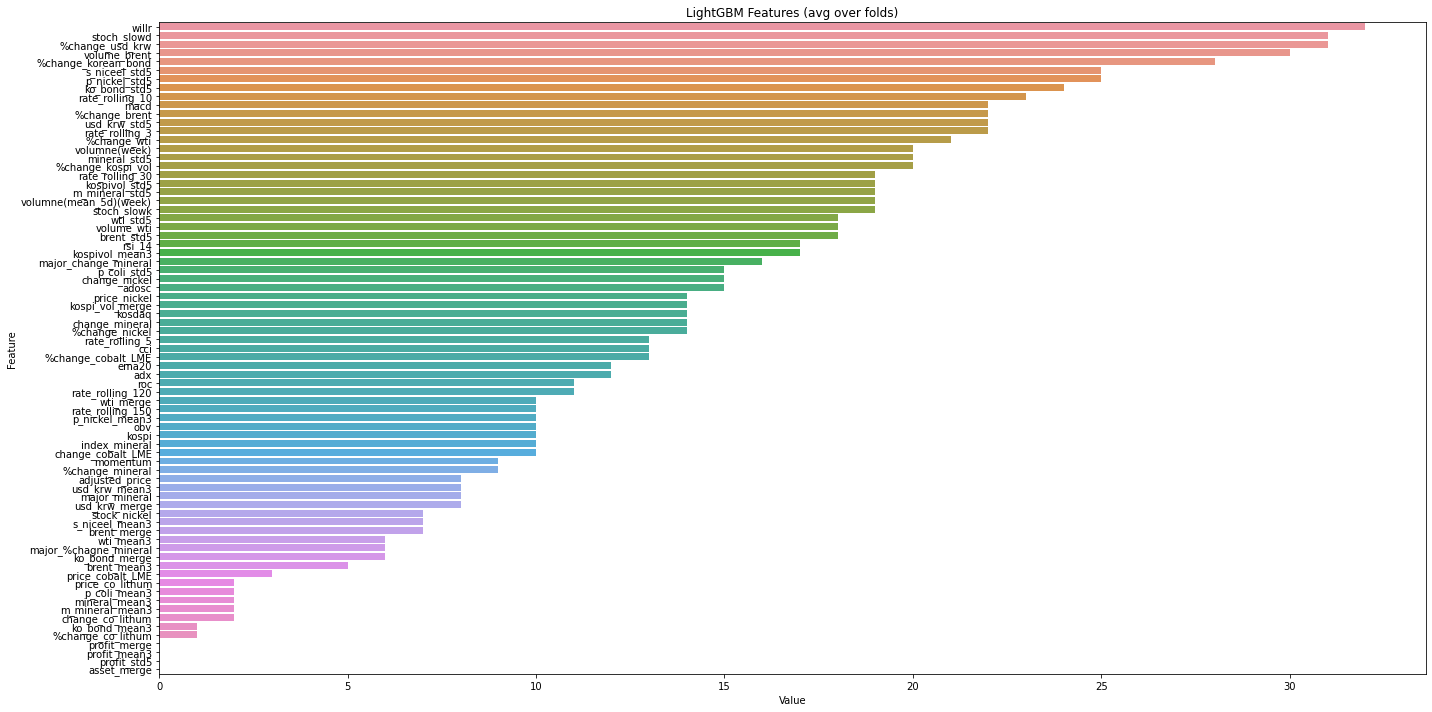

<Figure size 432x288 with 0 Axes>

In [63]:
feature_imp = pd.DataFrame(sorted(zip(model_lgbm.feature_importances_,X_train.drop('Date', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig(f'lgbm_importances_{company}.png')

In [64]:
feature_imp.sort_values(by="Value", ascending=False).iloc[:30].head()

,Value,Feature
74,32,willr
73,31,stoch_slowd
72,31,%change_usd_krw
71,30,volume_brent
70,28,%change_korean_bond


In [65]:
feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values

array(['willr', 'stoch_slowd', '%change_usd_krw', 'volume_brent',
       '%change_korean_bond', 's_niceel_std5', 'p_nickel_std5',
       'ko_bond_std5', 'rate_rolling_10', 'macd', '%change_brent',
       'usd_krw_std5', 'rate_rolling_3', '%change_wti', 'volumne(week)',
       'mineral_std5', '%change_kospi_vol', 'rate_rolling_30',
       'kospivol_std5', 'm_mineral_std5', 'volumne(mean_5d)(week)',
       'stoch_slowk', 'wti_std5', 'volume_wti', 'brent_std5', 'rsi_14',
       'kospivol_mean3', 'major_change_mineral', 'p_coli_std5',
       'change_nickel'], dtype=object)

In [66]:
lgbm_feature = list(feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values[:])

# Random Forest

In [67]:
# Random Forest
model_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

model_name, _, mean_score, _ = cross_validate_with_model(model_rf)
model_score[model_name] = mean_score
model_rf.fit(X_train.drop('Date', axis=1), y_train)

현재 교차검증 중인 모델 : RandomForestClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished


Test Mean Score : 31.37
Fit Time / Each CV : 1.78s


RandomForestClassifier(max_features='sqrt', n_estimators=700)

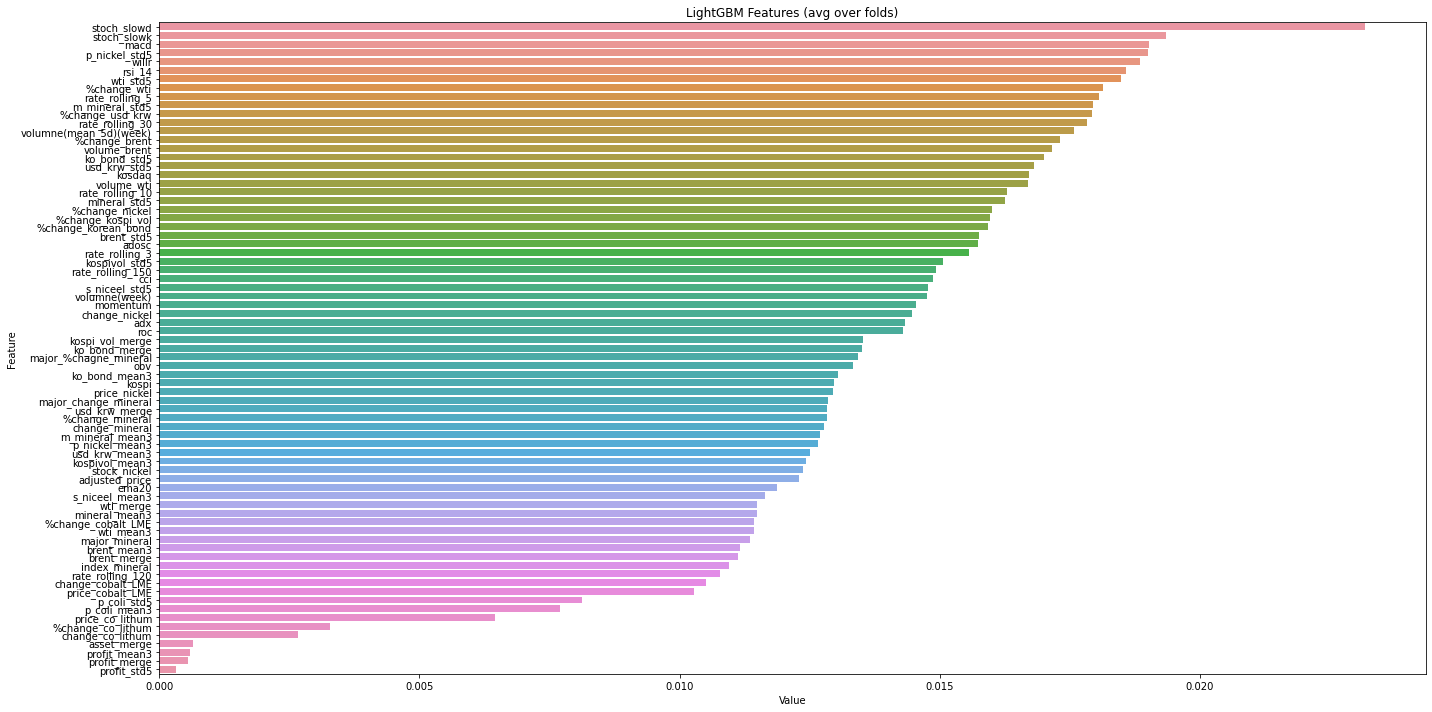

<Figure size 432x288 with 0 Axes>

In [68]:
feature_imp = pd.DataFrame(sorted(zip(model_rf.feature_importances_, X_train.drop('Date', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig(f'rf_importances_{company}.png')

In [69]:
feature_imp.sort_values(by="Value", ascending=False).iloc[:30].head()

,Value,Feature
74,0.023177,stoch_slowd
73,0.019338,stoch_slowk
72,0.019029,macd
71,0.019005,p_nickel_std5
70,0.018848,willr


In [70]:
feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values

array(['stoch_slowd', 'stoch_slowk', 'macd', 'p_nickel_std5', 'willr',
       'rsi_14', 'wti_std5', '%change_wti', 'rate_rolling_5',
       'm_mineral_std5', '%change_usd_krw', 'rate_rolling_30',
       'volumne(mean_5d)(week)', '%change_brent', 'volume_brent',
       'ko_bond_std5', 'usd_krw_std5', 'kosdaq', 'volume_wti',
       'rate_rolling_10', 'mineral_std5', '%change_nickel',
       '%change_kospi_vol', '%change_korean_bond', 'brent_std5', 'adosc',
       'rate_rolling_3', 'kospivol_std5', 'rate_rolling_150', 'cci'],
      dtype=object)

In [71]:
rf_feature = list(feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values[:])

# CatBoost

In [72]:
from catboost import CatBoostClassifier

In [73]:
# CatBoost
# model_catb = CatBoostClassifier(iterations=300,
#                              learning_rate=0.05,
#                              depth=10,
# #                              eval_metric='RMSE',
#                              random_seed = 42,
#                                 loss_function='MultiClass',
#                              bagging_temperature = 0.2,
#                              od_type='Iter',
#                              metric_period = 50,
#                              od_wait=20)
model_catb = CatBoostClassifier()
model_name, _, mean_score, _ = cross_validate_with_model(model_catb)
model_score[model_name] = mean_score
model_catb.fit(X_train.drop('Date', axis=1),y_train)

현재 교차검증 중인 모델 : CatBoostClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.3min finished


Test Mean Score : 31.88
Fit Time / Each CV : 134.85s
Learning rate set to 0.075407
0:	learn: 1.5934054	total: 120ms	remaining: 2m
1:	learn: 1.5785108	total: 182ms	remaining: 1m 30s
2:	learn: 1.5594334	total: 233ms	remaining: 1m 17s
3:	learn: 1.5425656	total: 282ms	remaining: 1m 10s
4:	learn: 1.5276184	total: 327ms	remaining: 1m 5s
5:	learn: 1.5168973	total: 367ms	remaining: 1m
6:	learn: 1.5038371	total: 418ms	remaining: 59.3s
7:	learn: 1.4916608	total: 465ms	remaining: 57.7s
8:	learn: 1.4796862	total: 511ms	remaining: 56.3s
9:	learn: 1.4668475	total: 557ms	remaining: 55.2s
10:	learn: 1.4547945	total: 615ms	remaining: 55.3s
11:	learn: 1.4439224	total: 658ms	remaining: 54.2s
12:	learn: 1.4305094	total: 698ms	remaining: 53s
13:	learn: 1.4166035	total: 737ms	remaining: 51.9s
14:	learn: 1.4076774	total: 784ms	remaining: 51.5s
15:	learn: 1.3998396	total: 824ms	remaining: 50.7s
16:	learn: 1.3861555	total: 864ms	remaining: 50s
17:	learn: 1.3780101	total: 905ms	remaining: 49.4s
18:	learn: 1.368

163:	learn: 0.5674285	total: 6.93s	remaining: 35.3s
164:	learn: 0.5655172	total: 6.96s	remaining: 35.2s
165:	learn: 0.5611005	total: 7s	remaining: 35.2s
166:	learn: 0.5573392	total: 7.04s	remaining: 35.1s
167:	learn: 0.5547006	total: 7.08s	remaining: 35.1s
168:	learn: 0.5508246	total: 7.13s	remaining: 35s
169:	learn: 0.5470875	total: 7.17s	remaining: 35s
170:	learn: 0.5441690	total: 7.21s	remaining: 34.9s
171:	learn: 0.5410639	total: 7.24s	remaining: 34.9s
172:	learn: 0.5372237	total: 7.28s	remaining: 34.8s
173:	learn: 0.5343246	total: 7.33s	remaining: 34.8s
174:	learn: 0.5303636	total: 7.37s	remaining: 34.7s
175:	learn: 0.5273850	total: 7.41s	remaining: 34.7s
176:	learn: 0.5254826	total: 7.45s	remaining: 34.6s
177:	learn: 0.5226424	total: 7.49s	remaining: 34.6s
178:	learn: 0.5198028	total: 7.53s	remaining: 34.5s
179:	learn: 0.5170805	total: 7.57s	remaining: 34.5s
180:	learn: 0.5139932	total: 7.61s	remaining: 34.4s
181:	learn: 0.5108733	total: 7.65s	remaining: 34.4s
182:	learn: 0.50939

323:	learn: 0.2824692	total: 13.6s	remaining: 28.4s
324:	learn: 0.2822082	total: 13.6s	remaining: 28.3s
325:	learn: 0.2813623	total: 13.7s	remaining: 28.3s
326:	learn: 0.2809839	total: 13.7s	remaining: 28.2s
327:	learn: 0.2800579	total: 13.8s	remaining: 28.2s
328:	learn: 0.2788943	total: 13.8s	remaining: 28.1s
329:	learn: 0.2778123	total: 13.8s	remaining: 28.1s
330:	learn: 0.2766776	total: 13.9s	remaining: 28.1s
331:	learn: 0.2756737	total: 13.9s	remaining: 28s
332:	learn: 0.2742644	total: 14s	remaining: 28s
333:	learn: 0.2729965	total: 14s	remaining: 27.9s
334:	learn: 0.2723999	total: 14s	remaining: 27.9s
335:	learn: 0.2715768	total: 14.1s	remaining: 27.8s
336:	learn: 0.2705956	total: 14.1s	remaining: 27.8s
337:	learn: 0.2697850	total: 14.2s	remaining: 27.8s
338:	learn: 0.2687636	total: 14.2s	remaining: 27.7s
339:	learn: 0.2677559	total: 14.3s	remaining: 27.7s
340:	learn: 0.2664224	total: 14.3s	remaining: 27.6s
341:	learn: 0.2653848	total: 14.3s	remaining: 27.6s
342:	learn: 0.2640608	

482:	learn: 0.1681818	total: 20.2s	remaining: 21.6s
483:	learn: 0.1676634	total: 20.2s	remaining: 21.6s
484:	learn: 0.1672137	total: 20.3s	remaining: 21.5s
485:	learn: 0.1670867	total: 20.3s	remaining: 21.5s
486:	learn: 0.1669660	total: 20.4s	remaining: 21.4s
487:	learn: 0.1664314	total: 20.4s	remaining: 21.4s
488:	learn: 0.1660375	total: 20.4s	remaining: 21.4s
489:	learn: 0.1654911	total: 20.5s	remaining: 21.3s
490:	learn: 0.1649789	total: 20.5s	remaining: 21.3s
491:	learn: 0.1644404	total: 20.6s	remaining: 21.2s
492:	learn: 0.1639772	total: 20.6s	remaining: 21.2s
493:	learn: 0.1633455	total: 20.6s	remaining: 21.1s
494:	learn: 0.1630644	total: 20.7s	remaining: 21.1s
495:	learn: 0.1627351	total: 20.7s	remaining: 21s
496:	learn: 0.1623984	total: 20.8s	remaining: 21s
497:	learn: 0.1620127	total: 20.8s	remaining: 21s
498:	learn: 0.1615415	total: 20.8s	remaining: 20.9s
499:	learn: 0.1608906	total: 20.9s	remaining: 20.9s
500:	learn: 0.1603912	total: 20.9s	remaining: 20.8s
501:	learn: 0.1600

643:	learn: 0.1127135	total: 26.7s	remaining: 14.8s
644:	learn: 0.1125373	total: 26.7s	remaining: 14.7s
645:	learn: 0.1122703	total: 26.8s	remaining: 14.7s
646:	learn: 0.1121615	total: 26.8s	remaining: 14.6s
647:	learn: 0.1118758	total: 26.8s	remaining: 14.6s
648:	learn: 0.1116239	total: 26.9s	remaining: 14.5s
649:	learn: 0.1115025	total: 26.9s	remaining: 14.5s
650:	learn: 0.1112178	total: 27s	remaining: 14.5s
651:	learn: 0.1108978	total: 27s	remaining: 14.4s
652:	learn: 0.1107520	total: 27s	remaining: 14.4s
653:	learn: 0.1105843	total: 27.1s	remaining: 14.3s
654:	learn: 0.1103147	total: 27.1s	remaining: 14.3s
655:	learn: 0.1100251	total: 27.2s	remaining: 14.2s
656:	learn: 0.1098385	total: 27.2s	remaining: 14.2s
657:	learn: 0.1096345	total: 27.2s	remaining: 14.2s
658:	learn: 0.1094158	total: 27.3s	remaining: 14.1s
659:	learn: 0.1092439	total: 27.3s	remaining: 14.1s
660:	learn: 0.1091012	total: 27.4s	remaining: 14s
661:	learn: 0.1087542	total: 27.4s	remaining: 14s
662:	learn: 0.1084376	

806:	learn: 0.0817064	total: 33.4s	remaining: 7.99s
807:	learn: 0.0816710	total: 33.5s	remaining: 7.95s
808:	learn: 0.0815212	total: 33.5s	remaining: 7.91s
809:	learn: 0.0814408	total: 33.5s	remaining: 7.87s
810:	learn: 0.0813241	total: 33.6s	remaining: 7.82s
811:	learn: 0.0812425	total: 33.6s	remaining: 7.78s
812:	learn: 0.0811846	total: 33.7s	remaining: 7.74s
813:	learn: 0.0810460	total: 33.7s	remaining: 7.7s
814:	learn: 0.0808496	total: 33.7s	remaining: 7.66s
815:	learn: 0.0807008	total: 33.8s	remaining: 7.62s
816:	learn: 0.0805264	total: 33.8s	remaining: 7.58s
817:	learn: 0.0803553	total: 33.9s	remaining: 7.54s
818:	learn: 0.0801970	total: 33.9s	remaining: 7.5s
819:	learn: 0.0801606	total: 34s	remaining: 7.45s
820:	learn: 0.0799514	total: 34s	remaining: 7.41s
821:	learn: 0.0798123	total: 34s	remaining: 7.37s
822:	learn: 0.0796432	total: 34.1s	remaining: 7.33s
823:	learn: 0.0794387	total: 34.1s	remaining: 7.29s
824:	learn: 0.0792734	total: 34.2s	remaining: 7.25s
825:	learn: 0.079104

970:	learn: 0.0622108	total: 40.3s	remaining: 1.2s
971:	learn: 0.0621339	total: 40.3s	remaining: 1.16s
972:	learn: 0.0620700	total: 40.3s	remaining: 1.12s
973:	learn: 0.0620150	total: 40.4s	remaining: 1.08s
974:	learn: 0.0619206	total: 40.4s	remaining: 1.04s
975:	learn: 0.0617828	total: 40.5s	remaining: 995ms
976:	learn: 0.0616874	total: 40.5s	remaining: 953ms
977:	learn: 0.0615667	total: 40.5s	remaining: 912ms
978:	learn: 0.0615502	total: 40.6s	remaining: 870ms
979:	learn: 0.0614847	total: 40.6s	remaining: 829ms
980:	learn: 0.0613999	total: 40.7s	remaining: 788ms
981:	learn: 0.0613371	total: 40.7s	remaining: 746ms
982:	learn: 0.0611987	total: 40.7s	remaining: 705ms
983:	learn: 0.0611000	total: 40.8s	remaining: 663ms
984:	learn: 0.0610484	total: 40.8s	remaining: 622ms
985:	learn: 0.0609464	total: 40.9s	remaining: 580ms
986:	learn: 0.0608646	total: 40.9s	remaining: 539ms
987:	learn: 0.0607588	total: 41s	remaining: 497ms
988:	learn: 0.0606487	total: 41s	remaining: 456ms
989:	learn: 0.060

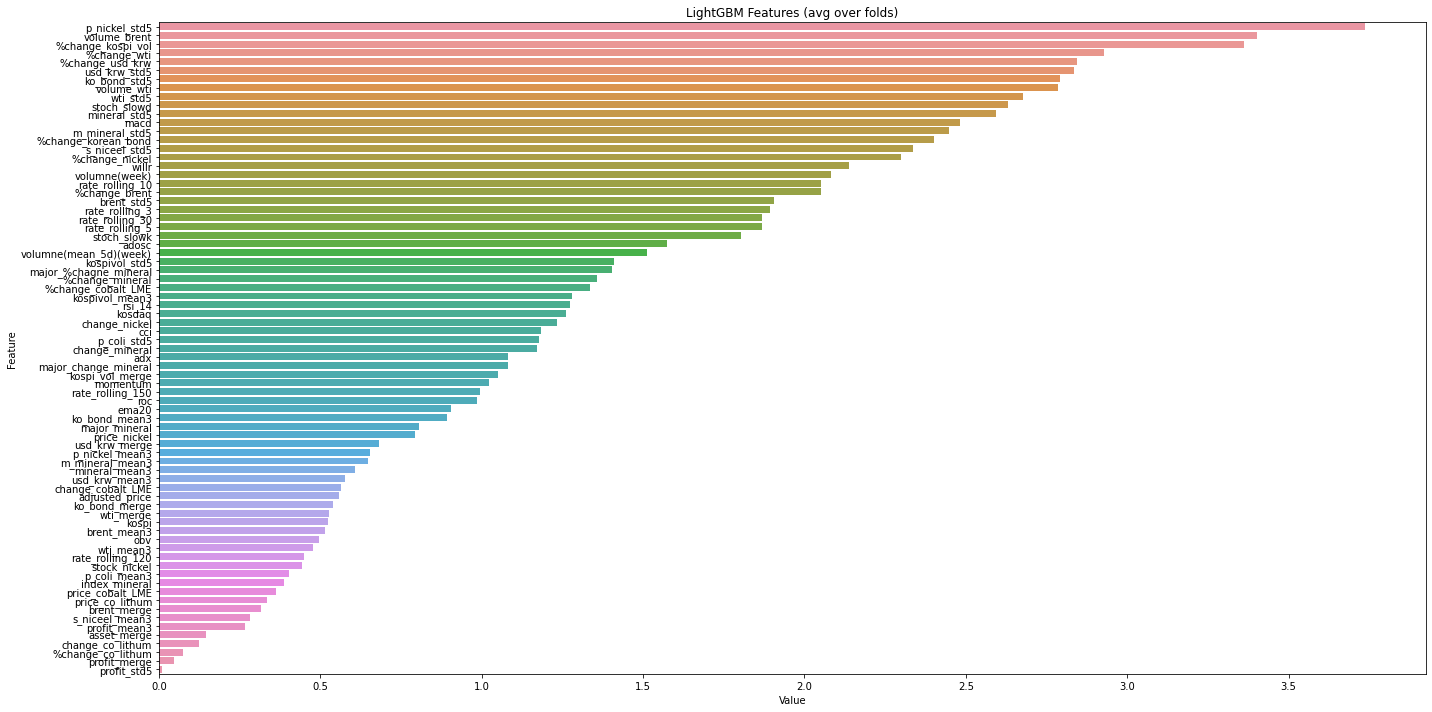

In [74]:
feature_imp = pd.DataFrame(sorted(zip(model_catb.feature_importances_,X_train.drop('Date', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances-01.png')

In [75]:
feature_imp.sort_values(by="Value", ascending=False).iloc[:30].head()

,Value,Feature
74,3.737771,p_nickel_std5
73,3.401254,volume_brent
72,3.362888,%change_kospi_vol
71,2.927905,%change_wti
70,2.843847,%change_usd_krw


In [76]:
feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values

array(['p_nickel_std5', 'volume_brent', '%change_kospi_vol',
       '%change_wti', '%change_usd_krw', 'usd_krw_std5', 'ko_bond_std5',
       'volume_wti', 'wti_std5', 'stoch_slowd', 'mineral_std5', 'macd',
       'm_mineral_std5', '%change_korean_bond', 's_niceel_std5',
       '%change_nickel', 'willr', 'volumne(week)', 'rate_rolling_10',
       '%change_brent', 'brent_std5', 'rate_rolling_3', 'rate_rolling_30',
       'rate_rolling_5', 'stoch_slowk', 'adosc', 'volumne(mean_5d)(week)',
       'kospivol_std5', 'major_%chagne_mineral', '%change_mineral'],
      dtype=object)

In [77]:
cat_feature = list(feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values[:])

# NGBoost

In [78]:
from ngboost import NGBClassifier

In [79]:
# model_ngb =  NGBClassifier(n_estimators=500, learning_rate=0.01,
# #               Dist=Normal,
#               Base=default_tree_learner,
#               natural_gradient=False,
#               minibatch_frac=1.0)
# # model_name, _, mean_score, _ = cross_validate_with_model(model_ngb)
# # model_score[model_name] = mean_score
# model_ngb.fit(X_train.drop('Date', axis=1), y_train)

In [80]:
# model_ngb.predict(test_X.drop('Date',axis=1))

In [81]:
# feature_imp = pd.DataFrame(sorted(zip(model_ngb.feature_importances_[0],X_train.drop('Date', axis=1).columns)), columns=['Value','Feature'])

# plt.figure(figsize=(20, 10))
# sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
# plt.title('LightGBM Features (avg over folds)')
# plt.tight_layout()
# plt.show()
# # plt.savefig('lgbm_importances-01.png')

In [82]:
# feature_imp.sort_values(by="Value", ascending=False).iloc[:30].head()

In [83]:
# feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values

In [84]:
# ng_feature = list(feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values[:])


# feature selection

In [85]:
# len(set(lgbm_feature)|set(rf_feature)|set(cat_feature)|set(ng_feature))

In [86]:
# len(set(lgbm_feature)&set(rf_feature)&set(cat_feature)&set(ng_feature))

In [87]:
len(set(lgbm_feature)&set(rf_feature)&set(cat_feature))

23

In [88]:
len(data.columns)

77

In [89]:
list(set(lgbm_feature)&set(rf_feature)&set(cat_feature))

['kospivol_std5',
 'p_nickel_std5',
 '%change_brent',
 'rate_rolling_10',
 'rate_rolling_30',
 'rate_rolling_3',
 'macd',
 'brent_std5',
 'wti_std5',
 '%change_wti',
 'volume_wti',
 '%change_korean_bond',
 'willr',
 'stoch_slowk',
 '%change_usd_krw',
 'volume_brent',
 'mineral_std5',
 'volumne(mean_5d)(week)',
 'usd_krw_std5',
 '%change_kospi_vol',
 'ko_bond_std5',
 'stoch_slowd',
 'm_mineral_std5']

# Ensemble

In [ ]:
model_soft_voting = VotingClassifier([ 
    ('RandomForest Classifier', model_rf),
    ('LightGBM Classfier', model_lgbm),
    ('CatBoosting Classifier', model_catb),
    ('NGBoost Classfier', model_ngb)
],
    voting='soft')

In [ ]:
model_soft_voting.fit(X_train.drop('Date', axis=1), y_train)
model_soft_voting.score(X_val.drop('Date', axis=1), y_val)

In [ ]:
model_soft_voting.predict(test_X.drop('Date',axis=1))

In [ ]:
model_bagging = BaggingClassifier(model_lgbm,
                                  max_samples=0.5, max_features=10)

In [ ]:
model_bagging.fit(X_train.drop('Date', axis=1), y_train)
model_bagging.score(X_val.drop('Date', axis=1),y_val)

In [ ]:
models = [LGBMClassifier(),          
          RandomForestClassifier(),
          XGBClassifier()]

In [ ]:
S_train, S_val = stacking(models,
                          X_train.drop('Date', axis=1),
                          y_train,
                          X_val.drop('Date', axis=1),
                          regression=False,
                          metric=accuracy_score,
                          n_folds=4,
                          stratified=True,
                          shuffle=True,
                          random_state=0,
                          verbose=2)

In [ ]:
model_stacking_lgbm = LGBMClassifier(learning_rate=1,
                                     num_boost_round=1000,
                                     min_data_in_leaf=30)

In [ ]:
model_stacking_lgbm.fit(S_train, y_train)

In [ ]:
model_stacking_lgbm.score(S_val,y_val)

In [ ]:
for model in [model_soft_voting,model_bagging]:

    print('{}'.format(type(model).__name__))
    
    result = pd.DataFrame(model.predict_proba(X),columns=['d2','d1','hold','u1','u2']).head(40)
    profit = pd.DataFrame(data.profit_rate.values,columns=['profitrate']).head(40)
    _pred = pd.DataFrame(model.predict(X),columns=['pred']).head(40)
    _true = pd.DataFrame(y.values,columns=['true']).head(40)
    pd.concat([result,profit,_pred,_true],axis=1)

    y_pred = model.predict(X_val)
    print(classification_report(y_val,y_pred))